#### Prepared for Gabor's Data Analysis

### Data Analysis for Business, Economics, and Policy
by Gabor Bekes and  Gabor Kezdi
 
Cambridge University Press 2021

**[gabors-data-analysis.com ](https://gabors-data-analysis.com/)**

 License: Free to share, modify and use for educational purposes. 
 Not to be used for commercial purposes.

### Chapter 18
**CH18B Forecasting a home price index**

using case-schiller-la dataset

version 1.0 2021-05-05

In [20]:
import os
import sys
import warnings
from datetime import datetime
from pathlib import Path

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf
from mizani.breaks import date_breaks
from mizani.formatters import date_format
from plotnine import *
from sklearn.metrics import mean_squared_error

warnings.filterwarnings("ignore")



In [ ]:
python3 -m pip install --upgrade pip

SyntaxError: invalid syntax (2350214200.py, line 1)

In [11]:
%pip install --upgrade numpy pmdarima
from pmdarima.arima import auto_arima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 49.1 MB/s eta 0:00:00:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.5
    Uninstalling numpy-2.2.5:
      Successfully uninstalled numpy-2.2.5
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [2]:
path = Path(os.getcwd())

base_dir = path.parent.parent

data_in = os.path.join(str(base_dir), "da_data_repo/case-shiller-la/clean/")
data_out = os.path.join(str(base_dir), "da_data_repo/ch18-case-shiller-la/")
output = os.path.join(data_out, "output")
func = os.path.join(str(base_dir), "da_case_studies/ch00-tech-prep/")

sys.path.append(func)
from py_helper_functions import *


In [ ]:
csv_path = os.path.join("/workspaces/codespaces-jupyter/data/homeprices-data-2000-2018.csv")
data = pd.read_csv(csv_path)
#data = pd.read_csv("https://osf.io/download/n3jty/")

In [15]:
len(data)

228

In [13]:
data.head()

,date,year,month,ps,pn,us,un,emps,empn
0,2000-01-01,2000,1,101.031209,100.00000,5.0,5.4,14344.4,14132.8
1,2000-02-01,2000,2,102.043406,100.61896,5.0,5.3,14390.4,14270.0
2,2000-03-01,2000,3,103.224699,102.12780,5.0,5.3,14429.1,14421.3
3,2000-04-01,2000,4,104.159399,103.70410,5.0,4.7,14484.6,14450.8
4,2000-05-01,2000,5,104.924698,104.98908,5.0,4.7,14549.9,14590.2


In [14]:
data = data.assign(date=lambda x: x.date.str[0:7])
data = data.rename({"pn": "p", "us": "u", "emps": "emp"}, axis=1)

In [ ]:
data = data.sort_values(by=["date"]).assign(
    dp=lambda x: x.p.diff(1), # 
    p_lag=lambda x: x.p.shift(1),
    lnp=lambda x: np.log(x.p),
    dlnp=lambda x: x.lnp.diff(1),
    lnp_lag=lambda x: x.lnp.shift(1),
    dlnp_lag=lambda x: x.dlnp.shift(1),
    du=lambda x: x.u.diff(1),
    lnemp=lambda x: np.log(x.emp),
    dlnemp=lambda x: x.lnemp.diff(1),
    trend=lambda x: range(1, data.shape[0] + 1),
)


In [ ]:
# now save the workfile with data from 2000 through 2018
data.to_pickle("case-shiller-workfile-2000-2018.pkl")

In [18]:
# and now create and save the workfile with data from 2000 through 2017
data = data.loc[lambda x: x.year <= 2017]
data.to_pickle("case-shiller-workfile-2000-2017.pkl")


In [9]:
# Figure 18.8


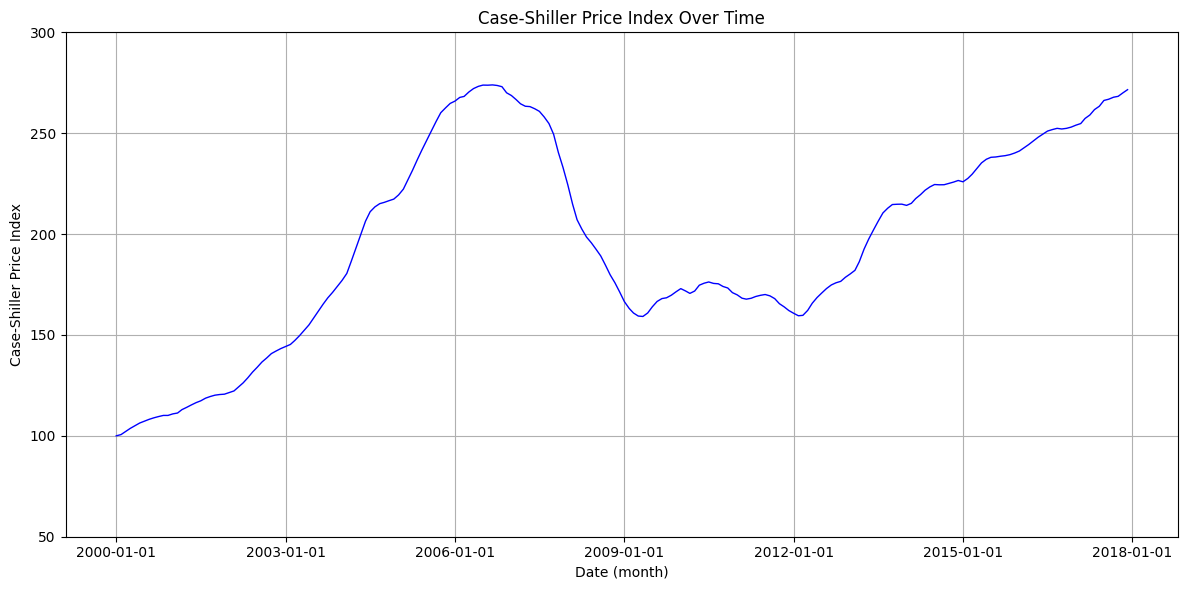

In [24]:
# Convert 'date' column to datetime for proper plotting
data['date'] = pd.to_datetime(data['date'])

# Create the plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='date', y='p', color='blue', linewidth=1)

# Set plot limits and labels
plt.ylim(50, 300)
plt.yticks(range(50, 301, 50))
plt.xlabel("Date (month)")
plt.ylabel("Case-Shiller Price Index")
plt.title("Case-Shiller Price Index Over Time")

# Format x-axis for better readability
plt.xticks(pd.date_range(start='2000-01-01', end='2018-01-01', freq='3YS'))

plt.grid(True)
plt.tight_layout()
plt.show()


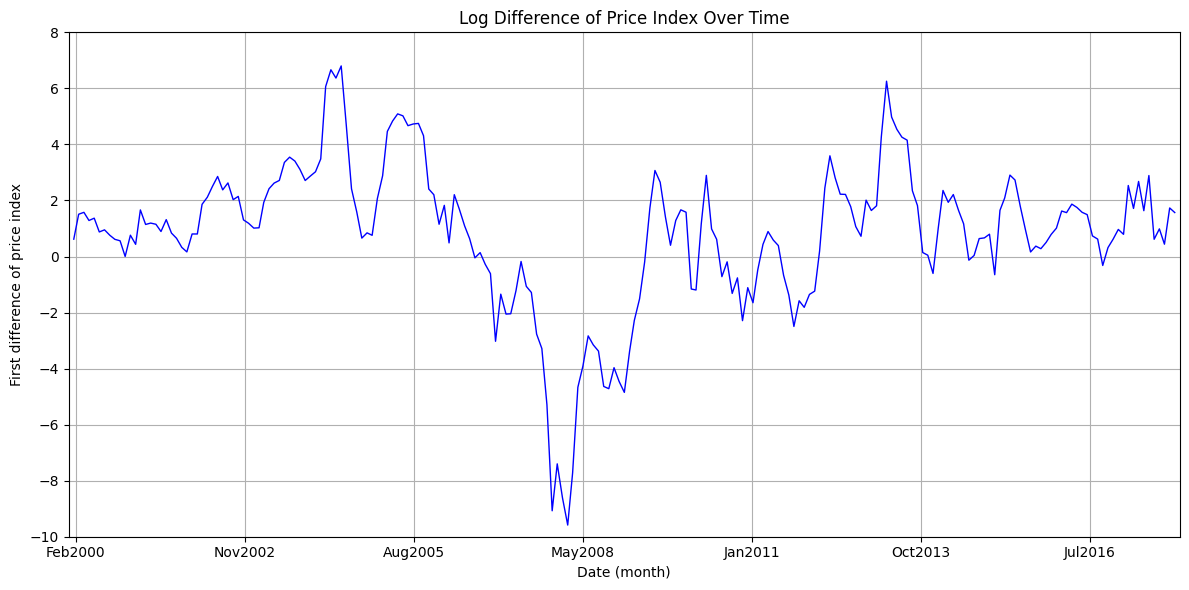

In [23]:
# Additional graphs, not in textbook
# Plot log difference of price index

plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='date', y='dp', color='blue', linewidth=1)

# Set y-axis limits and ticks
plt.ylim(-10, 8)
plt.yticks(range(-10, 9, 2))

# Set x-axis limits and format
plt.xlim(limits)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(8))
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b%Y'))

# Add labels and title
plt.xlabel("Date (month)")
plt.ylabel("First difference of price index")
plt.title("Log Difference of Price Index Over Time")

# Add grid and show plot
plt.grid(True)
plt.tight_layout()
plt.show()


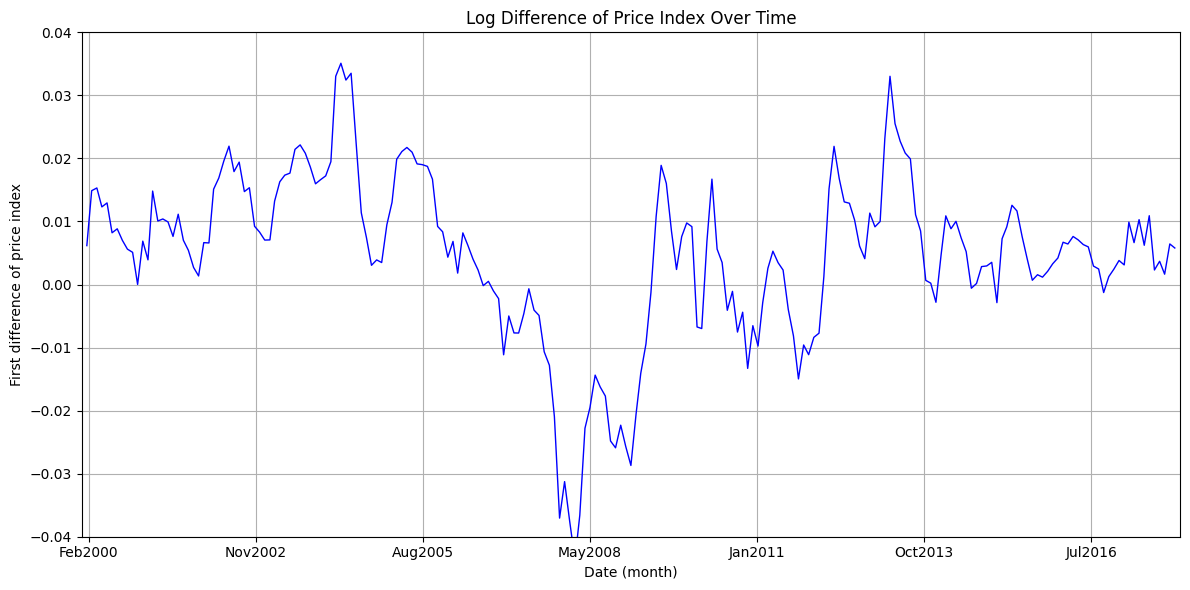

In [26]:
# Additional graphs, not in textbook
# Plot log difference of price index

plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='date', y='dlnp', color='blue', linewidth=1)

# Set y-axis limits and ticks
plt.ylim(-0.04, 0.04)
plt.yticks(np.arange(-0.04, 0.05, 0.01))

# Set x-axis limits and format
plt.xlim(limits)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(8))
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b%Y'))

# Add labels and title
plt.xlabel("Date (month)")
plt.ylabel("First difference of price index")
plt.title("Log Difference of Price Index Over Time")

# Add grid and show plot
plt.grid(True)
plt.tight_layout()
plt.show()


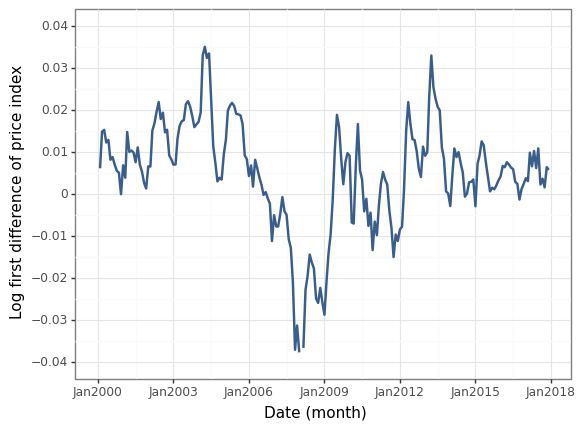

<ggplot: (382043386)>

In [12]:
# Plot log difference of price index
limits = datetime(2000, 1, 1), datetime(2018, 1, 1)
breaks = date_breaks("1 year")

dlnp_plot = (
    ggplot(data, aes(x="date", y="dlnp", group=1))
    + geom_line(color=color[0], size=1)
    + scale_y_continuous(limits=[-0.04, 0.04], breaks=seq(-0.04, 0.05, 0.01))
    + scale_x_date(breaks=breaks(limits)[::3], labels=date_format("%b%Y"))
    + labs(y="Log first difference of price index", x="Date (month)")
    + theme_bw()
)
dlnp_plot


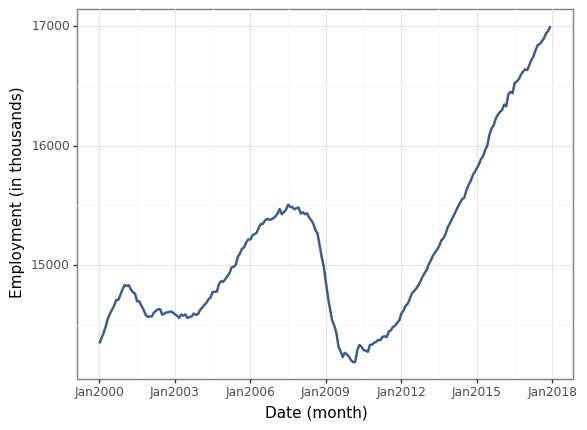

<ggplot: (382092454)>

In [13]:
## Figure 18.10

# additional graphs, not in textbook
# Plot log difference of price index

emp_plot = (
    ggplot(data, aes(x="date", y="emp", group=1))
    + geom_line(color=color[0], size=1)
    + scale_x_date(breaks=breaks(limits)[::3], labels=date_format("%b%Y"))
    + labs(y="Employment (in thousands)", x="Date (month)")
    + theme_bw()
)
emp_plot


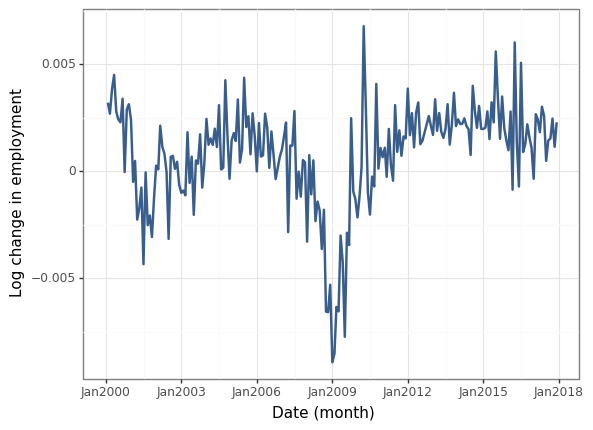

<ggplot: (382043552)>

In [14]:
# Plot log diff employment
lnemp_plot = (
    ggplot(data, aes(x="date", y="dlnemp", group=1))
    + geom_line(color=color[0], size=1)
    + scale_x_date(breaks=breaks(limits)[::3], labels=date_format("%b%Y"))
    + labs(y="Log change in employment", x="Date (month)")
    + theme_bw()
)

lnemp_plot


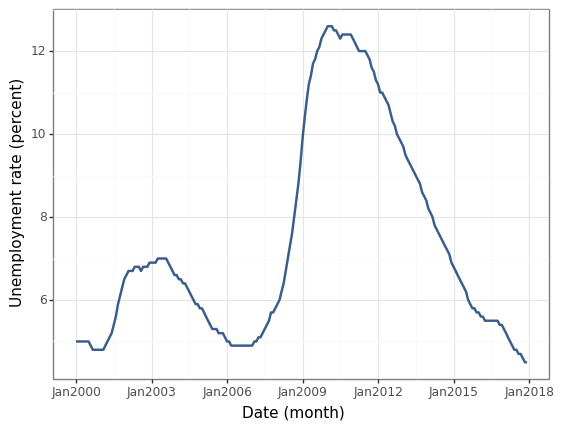

<ggplot: (381995635)>

In [15]:
# Plot unemployment rate
u_plot = (
    ggplot(data, aes(x="date", y="u", group=1))
    + geom_line(color=color[0], size=1)
    + scale_x_date(breaks=breaks(limits)[::3], labels=date_format("%b%Y"))
    + labs(y="Unemployment rate (percent)", x="Date (month)")
    + theme_bw()
)

u_plot


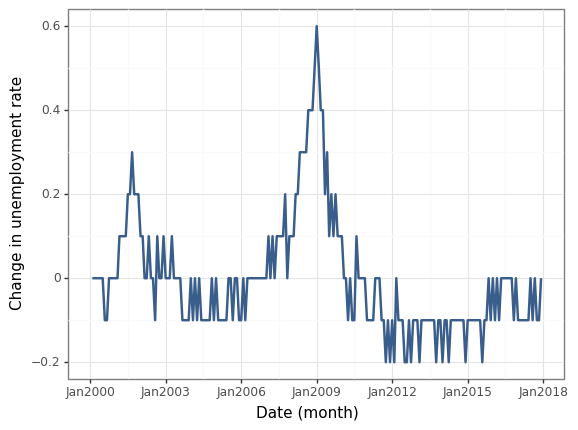

<ggplot: (381992421)>

In [16]:
# Plot diff unemployment

du_plot = (
    ggplot(data, aes(x="date", y="du", group=1))
    + geom_line(color=color[0], size=1)
    + scale_x_date(breaks=breaks(limits)[::3], labels=date_format("%b%Y"))
    + labs(y="Change in unemployment rate", x="Date (month)")
    + theme_bw()
)

du_plot


### Create work set and holdout set

In [17]:
from datetime import datetime

data["date"] = data["date"].apply(lambda x: datetime.strptime(x, "%Y-%m"))


In [18]:
# create work and holdout sets
data_holdout = data.loc[lambda x: x["year"] == 2017, :]
data_work = data.loc[lambda x: x["year"] < 2017, :]


In [19]:
# create training and test sets for 4 folds

for year in range(2013, 2017):
    fold = year - 2012
    data_work["test" + str(fold)] = data_work["year"] == year
    data_work["train" + str(fold)] = (data_work["year"] <= year - 1) & (
        data_work["year"] >= year - 13
    )


In [20]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.api import VAR


In [21]:
# Model M1
# p on trend & seasonality
mse_1 = []
for i in range(1, 5):

    train_data = data_work.loc[lambda x: x["train" + str(i)] == 1]
    test_data = data_work.loc[lambda x: x["test" + str(i)] == 1]

    model1 = smf.ols("p ~ trend + C(month)", train_data).fit()

    phat = model1.predict(test_data)

    errsq = np.square(test_data.p.values - phat)

    mse_1.append(np.mean(errsq))

rmse_cv_m1 = np.sqrt(np.mean(mse_1))


In [22]:
# Model M2
# p ARIMA(1,1,2)

# Get order from auto_arima

auto_arima_m2 = auto_arima(
    y=data_work.p,
    start_p=0,
    max_p=1,  # without this constrain, python returns other ARIMA order
    max_order=0,
    seasonal=False,
)

mse_2 = []
for i in range(1, 5):

    train_data = data_work.loc[lambda x: x["train" + str(i)] == 1]
    test_data = data_work.loc[lambda x: x["test" + str(i)] == 1]

    model2 = ARIMA(train_data.p, order=auto_arima_m2.get_params()["order"]).fit()

    phat = model2.forecast(steps=12)

    errsq = np.square(test_data.p.values - phat)

    mse_2.append(np.mean(errsq))

rmse_cv_m2 = np.sqrt(np.mean(mse_2))


In [23]:
# Model M3
# p ARIMA(1,1,0)

# Get order from auto_arima

auto_arima_m3 = auto_arima(
    y=data_work.p, X=pd.get_dummies(data_work.month), max_order=0, seasonal=False
)

mse_3 = []
for i in range(1, 5):

    train_data = data_work.loc[lambda x: x["train" + str(i)] == 1]
    test_data = data_work.loc[lambda x: x["test" + str(i)] == 1]

    model3 = ARIMA(
        train_data.p,
        exog=pd.get_dummies(train_data.month),
        order=auto_arima_m3.get_params()["order"],
    ).fit()

    phat = model3.forecast(steps=12, exog=pd.get_dummies(test_data.month))

    errsq = np.square(test_data.p.values - phat)

    mse_3.append(np.mean(errsq))

rmse_cv_m3 = np.sqrt(np.mean(mse_3))


In [24]:
# Model M4
# p ARIMA(2,0,0) + seasonality + trend

# Get order from auto_arima
auto_arima_m4 = auto_arima(
    y=data_work.p,
    X=pd.get_dummies(data_work.month).assign(t=data_work.trend),
    max_order=0,
    seasonal=False,
)

mse_4 = []
for i in range(1, 5):

    train_data = data_work.loc[lambda x: x["train" + str(i)] == 1]
    test_data = data_work.loc[lambda x: x["test" + str(i)] == 1]

    model4 = ARIMA(
        train_data.p,
        exog=pd.get_dummies(train_data.month),
        trend="t",
        order=auto_arima_m4.get_params()["order"],
    ).fit()

    phat = model4.forecast(steps=12, exog=pd.get_dummies(test_data.month), trend="t")

    errsq = np.square(test_data.p.values - phat)

    mse_4.append(np.mean(errsq))

rmse_cv_m4 = np.sqrt(np.mean(mse_4))


In [25]:
# Model M5
# dp ~ month + trend, without any ARIMA

mse_5 = []
for i in range(1, 5):

    train_data = data_work.loc[lambda x: x["train" + str(i)] == 1]
    test_data = data_work.loc[lambda x: x["test" + str(i)] == 1]

    model5 = smf.ols("dp ~ trend + C(month)", train_data).fit()

    dphat = model5.predict(test_data)

    test_data["phat"] = None
    for i in range(0, 12):
        if i == 0:
            test_data.iloc[i, -1] = train_data["p"].values[-1] + dphat.iloc[i]
        else:
            test_data.iloc[i, -1] = test_data.iloc[i - 1, -1] + dphat.iloc[i]

    errsq = np.square(test_data["p"] - test_data["phat"])

    mse_5.append(np.mean(errsq))

rmse_cv_m5 = np.sqrt(np.mean(mse_5))


In [26]:
# Model M6
# lnp ARIMA(0,2,0) + seasonality

# Get order from auto_arima
auto_arima_m6 = auto_arima(
    y=data_work.lnp,
    X=pd.get_dummies(data_work.month),
    d=2,  # without this constrain, python returns other ARIMA order
    max_order=0,
    seasonal=True,
)

mse_6 = []
for i in range(1, 5):

    train_data = data_work.loc[lambda x: x["train" + str(i)] == 1]
    test_data = data_work.loc[lambda x: x["test" + str(i)] == 1]

    model6 = ARIMA(
        train_data.lnp,
        exog=pd.get_dummies(train_data.month),
        order=auto_arima_m6.get_params()["order"],
    ).fit()

    lnphat = model6.forecast(steps=12, exog=pd.get_dummies(test_data.month))

    corrb = mean_squared_error(test_data.lnp, lnphat)

    phat = np.exp((lnphat + corrb / 2))

    errsq = np.square(test_data.p.values - phat)

    mse_6.append(np.mean(errsq))

rmse_cv_m6 = np.sqrt(np.mean(mse_6))


In [27]:
# VAR

mse_var = []
for i in range(1, 5):

    train_data = data_work.loc[lambda x: x["train" + str(i)] == 1, :].dropna()
    test_data = data_work.loc[lambda x: x["test" + str(i)] == 1, :].dropna()

    model7 = VAR(train_data[["dp", "du", "dlnemp"]]).fit(1)

    dphat = model7.forecast(
        train_data[["dp", "du", "dlnemp"]].values[-model7.k_ar :], steps=12
    )[:, 0]

    test_data["phat"] = None
    for i in range(0, 12):
        if i == 0:
            test_data.iloc[i, -1] = train_data["p"].values[-1] + dphat[i]
        else:
            test_data.iloc[i, -1] = test_data.iloc[i - 1, -1] + dphat[i]

    errsq = np.square(test_data["p"] - test_data["phat"])

    mse_var.append(np.mean(errsq))

rmse_cv_m7 = np.sqrt(np.mean(mse_var))


In [28]:
# Note. This VAR includes month dummies
# Textbook results are from R, where
# we could not figure out how to inlcude month dummies

mse_var_season = []
for i in range(1, 5):

    train_data = data_work.loc[lambda x: x["train" + str(i)] == 1, :].dropna()
    test_data = data_work.loc[lambda x: x["test" + str(i)] == 1, :].dropna()

    model7_season = VAR(
        train_data[["dp", "du", "dlnemp"]], exog=pd.get_dummies(train_data["month"])
    ).fit(1)

    dphat = model7_season.forecast(
        train_data[["dp", "du", "dlnemp"]].values[-model7_season.k_ar :],
        exog_future=pd.get_dummies(test_data["month"]).values,
        steps=12,
    )[:, 0]

    test_data["phat"] = None
    for i in range(0, 12):
        if i == 0:
            test_data.iloc[i, -1] = train_data["p"].values[-1] + dphat[i]
        else:
            test_data.iloc[i, -1] = test_data.iloc[i - 1, -1] + dphat[i]

    errsq = np.square(test_data["p"] - test_data["phat"])

    mse_var_season.append(np.mean(errsq))

rmse_cv_m7_season = np.sqrt(np.mean(mse_var_season))


In [29]:
# Note: some model's cv rmse differns from textbook

pd.DataFrame(
    [mse_1, mse_2, mse_3, mse_4, mse_5, mse_6, mse_var],
    columns=["Fold" + str(i) for i in range(1, 5)],
).apply(np.sqrt).assign(
    Average=[
        rmse_cv_m1,
        rmse_cv_m2,
        rmse_cv_m3,
        rmse_cv_m4,
        rmse_cv_m5,
        rmse_cv_m6,
        rmse_cv_m7,
    ],
    model=["M" + str(i) for i in range(1, 7)] + ["M7 (var)"],
).round(
    2
).set_index(
    "model"
)


,Fold1,Fold2,Fold3,Fold4,Average
model,,,,,
M1,14.90,17.59,34.43,48.58,31.93
M2,14.82,8.39,6.23,5.53,9.48
M3,6.68,1.39,3.28,3.22,4.11
M4,3.00,1.24,1.37,2.03,2.04
M5,33.94,9.79,10.42,7.39,18.78
M6,2.52,4.92,9.31,9.73,7.28
M7 (var),13.90,6.33,3.40,3.63,8.03


In [30]:
print("RMSE for VAR with seasonality (not in book):", rmse_cv_m7_season)


RMSE for VAR with seasonality (not in book): 4.531352403195174


### predict for holdout

In [31]:
# best model is M4
# re-estimate best models on full work set
model_final = ARIMA(
    data_work.p, exog=pd.get_dummies(data_work.month), trend="t", order=(2, 0, 0)
).fit()


In [32]:
pred_final = model_final.get_forecast(
    steps=12, exog=pd.get_dummies(data_holdout.month), trend="t"
)


In [33]:
forecast_holdout_best = (
    data_holdout.assign(p_pred=pred_final.predicted_mean.values, model="best")
    .join(pred_final.conf_int(alpha=0.2))
    .filter(["model", "p_pred", "lower p", "upper p"])
)


In [34]:
data_plot = (
    data.join(forecast_holdout_best)
    .loc[lambda x: x.year >= 2015]
    .reset_index(drop=True)
)


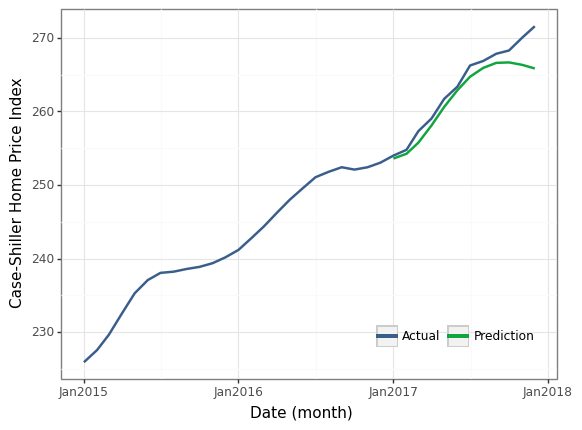

<ggplot: (381998891)>

In [35]:
data_plot_1 = pd.melt(data_plot.filter(["date", "p", "p_pred"]), ["date"])

pred_p_plot = (
    ggplot(data_plot_1, aes(x="date", y="value", color="variable"))
    + geom_line(size=1)
    + ylab("Case-Shiller Home Price Index")
    + xlab("Date (month)")
    + scale_color_manual(
        name=" ", values=(color[0], color[1]), labels=("Actual", "Prediction")
    )
    + scale_x_date(date_breaks="1 years", labels=date_format("%b%Y"))
    + theme_bw()
    + theme(
        legend_position=(0.74, 0.2),
        legend_direction="horizontal",
        legend_title=element_blank(),
        legend_background=element_blank(),
        legend_box_background=element_rect(color="white"),
    )
)
pred_p_plot

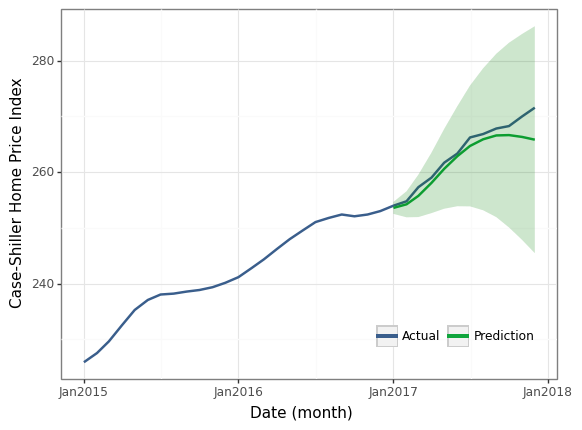

<ggplot: (393653239)>

In [36]:
data_plot_2 = pd.melt(
    data_plot.filter(["date", "p", "p_pred", "lower p", "upper p"]),
    ["date", "lower p", "upper p"],
)

pred_p_plot = (
    ggplot(data_plot_2, aes(x="date", y="value", color="variable", group="variable"))
    + geom_line(size=1)
    + geom_ribbon(
        aes(ymin="lower p", ymax="upper p"),
        fill="green",
        color=None,
        alpha=0.1,
    )
    + ylab("Case-Shiller Home Price Index")
    + xlab("Date (month)")
    + scale_color_manual(
        name=" ", values=(color[0], color[1]), labels=("Actual", "Prediction")
    )
    + scale_x_date(date_breaks="1 years", labels=date_format("%b%Y"))
    + theme_bw()
    + theme(
        legend_position=(0.74, 0.2),
        legend_direction="horizontal",
        legend_title=element_blank(),
        legend_background=element_blank(),
        legend_box_background=element_rect(color="white"),
    )
)
pred_p_plot

In [37]:
errsq = np.square(data_holdout.p.values - forecast_holdout_best.p_pred)

rmse_holdout = np.mean(errsq)
rmse_holdout


4.924744472466786

### EXTERNAL VALIDITY
### do the prediction for an extra year

In [38]:
data = pd.read_pickle("case-shiller-workfile-2000-2018.pkl")


In [39]:
data["date"] = data["date"].apply(lambda x: datetime.strptime(x, "%Y-%m"))


In [40]:
# create work and holdout sets
data_holdout = data.loc[lambda x: x["year"] == 2018, :]
data_work = data.loc[lambda x: x["year"] < 2018, :]


In [41]:
# best model is M4
# re-estimate best models on full work set
model_final = ARIMA(
    data_work.p, exog=pd.get_dummies(data_work.month), trend="t", order=(2, 0, 0)
).fit()


In [42]:
pred_final = model_final.get_forecast(
    steps=12, exog=pd.get_dummies(data_holdout.month), trend="t"
)


In [43]:
forecast_holdout_best = (
    data_holdout.assign(p_pred=pred_final.predicted_mean.values, model="best")
    .join(pred_final.conf_int(alpha=0.2))
    .filter(["model", "p_pred", "lower p", "upper p"])
)


In [44]:
data_plot = (
    data.join(forecast_holdout_best)
    .loc[lambda x: x.year >= 2015]
    .reset_index(drop=True)
)


## Figure 18.11 Prediction on new holdout

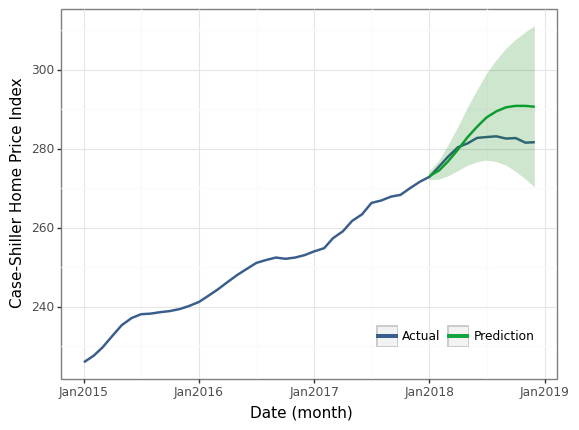

<ggplot: (393701102)>

In [45]:
data_plot_2 = pd.melt(
    data_plot.filter(["date", "p", "p_pred", "lower p", "upper p"]),
    ["date", "lower p", "upper p"],
)

pred_p_plot = (
    ggplot(data_plot_2, aes(x="date", y="value", color="variable", group="variable"))
    + geom_line(size=1)
    + geom_ribbon(
        aes(ymin="lower p", ymax="upper p"), fill="green", color=None, alpha=0.1
    )
    + ylab("Case-Shiller Home Price Index")
    + xlab("Date (month)")
    + scale_color_manual(
        name=" ", values=(color[0], color[1]), labels=("Actual", "Prediction")
    )
    + scale_x_date(date_breaks="1 years", labels=date_format("%b%Y"))
    + theme_bw()
    + theme(
        legend_position=(0.74, 0.2),
        legend_direction="horizontal",
        legend_title=element_blank(),
        legend_background=element_blank(),
        legend_box_background=element_rect(color="white"),
    )
)
pred_p_plot

In [46]:
errsq = np.square(data_holdout.p.values - forecast_holdout_best.p_pred)

rmse_holdout = np.mean(errsq)
rmse_holdout


31.170744959848065